In [1]:
import pandas as pd
birddata = pd.read_csv('bird_tracking.csv')

In [2]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [3]:
import matplotlib.pyplot as plt

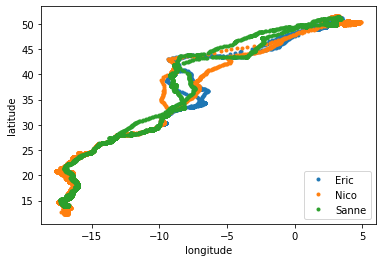

In [20]:
for name in pd.unique(birddata.bird_name):
    ind = birddata.bird_name == name
    x,y = birddata.longitude[ind], birddata.latitude[ind]
    plt.plot(x,y,'.',label=name)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(loc='lower right')
plt.savefig('TrajPlot.pdf')

In [25]:
import numpy as np
# Exploring flight speed
speed = birddata.speed_2d
print(np.isnan(speed).any())
print(np.sum(np.isnan(speed)))

True
443


In [27]:
speed = np.array(speed)

In [32]:
# Remove NaN values
speed = speed[~np.isnan(speed)]
print(np.isnan(speed).any())
print(np.sum(np.isnan(speed)))

False
0


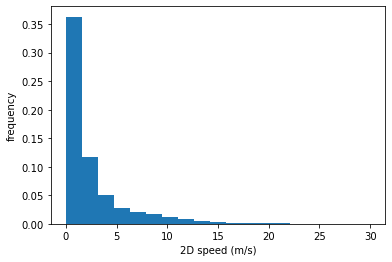

In [43]:
plt.hist(speed, bins=np.linspace(0,30,20), density=True)    #plot normalized histogram with specified bins
plt.ylabel('frequency');
plt.xlabel('2D speed (m/s)');

<AxesSubplot:ylabel='Frequency'>

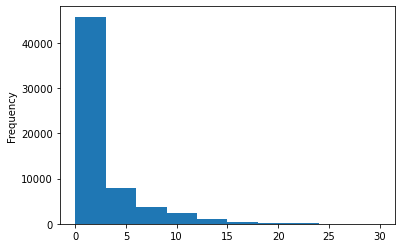

In [44]:
# plotting a hist from pandas (NaNs handled automatically)
birddata.speed_2d.plot(kind='hist',range=(0,30))

In [87]:
from datetime import datetime as dt

In [88]:
tstamp = []
for i in range(len(birddata)):
    tstamp.append(dt.strptime(birddata.date_time.iloc[i], '%Y-%m-%d %H:%M:%S+00'))

# convert to panda series and append to dataframe 
birddata['timestamp'] = pd.Series(tstamp,index = birddata.index)

In [89]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [90]:
elapsed_time = [birddata.timestamp[i] - birddata.timestamp[0] for i in range(len(tstamp))]

In [99]:
# Get number of time units elapsed
from datetime import timedelta
elapsed_days = np.array(elapsed_time)/timedelta(days=1)

In [100]:
# Binning time indices to compute daily mean speeds
inds = []    #to collect the indices of the same day
next_day = 1
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(speed[inds]))
        next_day += 1
        inds = []    #empty again

C:\Users\Sarth\Anaconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Sarth\Anaconda3\envs\myenv\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'daily mean speed (m/s)')

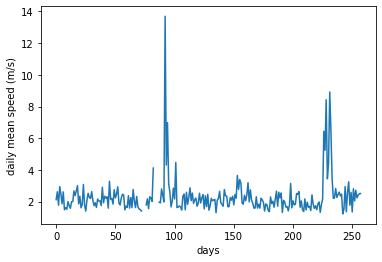

In [103]:
plt.plot(daily_mean_speed)
plt.xlabel('days')
plt.ylabel('daily mean speed (m/s)')

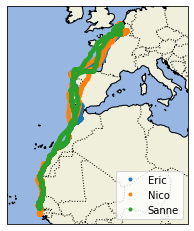

In [112]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
proj = ccrs.Mercator()    #Mercator projection
ax = plt.axes(projection = proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
for name in pd.unique(birddata.bird_name):
    ind = birddata.bird_name == name
    x,y = birddata.longitude[ind], birddata.latitude[ind]
    ax.plot(x,y,'.',transform = ccrs.Geodetic(),label=name)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(loc='lower right')
plt.savefig('TrajPlot1.pdf')